Index(['model', 'MPG', 'cylinders', 'horsepower', 'weigth', 'year', 'origin'], dtype='object')


<IPython.core.display.Javascript object>


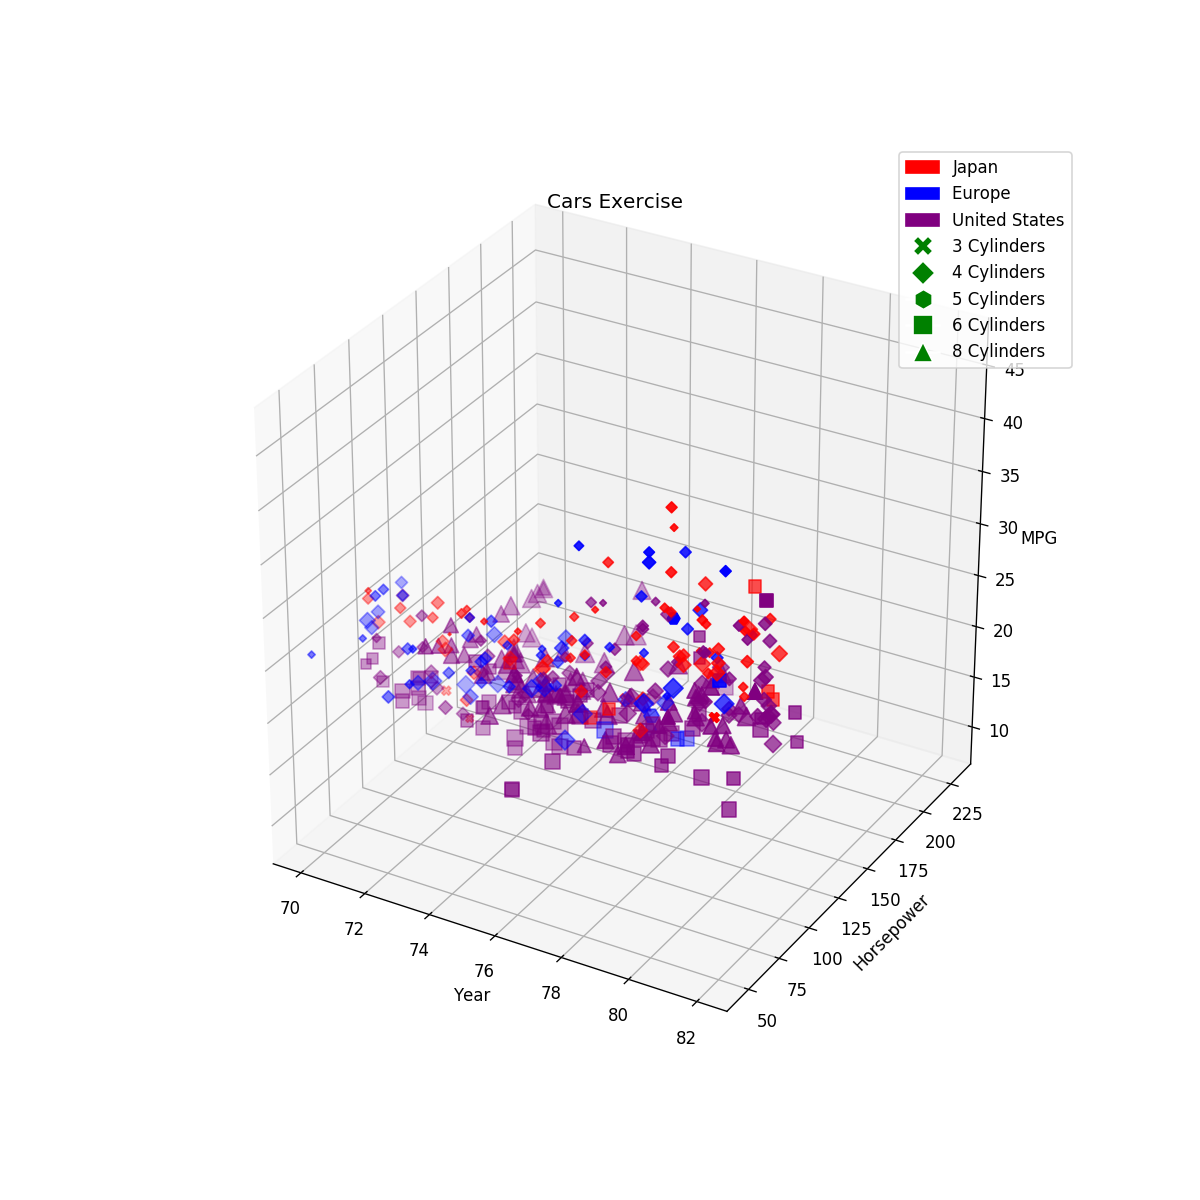

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

data_url = 'https://raw.githubusercontent.com/jamesk14022/cars_exercise/main/cars.csv'
df = pd.read_csv(data_url)
print(df.columns)

colour_map = {
        'US': 'purple',
        'Japan': 'red',
        'Europe': 'blue'
    }

%matplotlib notebook

#patch definition for colour legend
red_patch = mpatches.Patch(color='red', label='Japan')
blue_patch = mpatches.Patch(color='blue', label='Europe ')
purple_patch = mpatches.Patch(color='purple', label='United States')

#patch definition for shape legend
x_marker = Line2D([0], [0], marker='X', label='3 Cylinders', color ='w',  markerfacecolor='g', markersize=12)
diamond_marker = Line2D([0], [0], marker='D', markersize=10, color ='w',  markerfacecolor='g', label='4 Cylinders')
hexagon_marker = Line2D([0], [0], marker='h', markersize=12, color ='w',  markerfacecolor='g', label='5 Cylinders')
square_marker = Line2D([0], [0], marker='s', markersize=12, color ='w',  markerfacecolor='g', label='6 Cylinders')
triangle_up = Line2D([0], [0], marker='^', markersize=12, color ='w',  markerfacecolor='g', label='8 Cylinders')


marker_map = ['X', 'D', 'H', 's','^']

# normalise our weight
df['weigth']=(df['weigth']-df['weigth'].min())/(df['weigth'].max()-df['weigth'].min()) * 150

cy_list = [df[df['cylinders'] == i] for i in [3, 4, 5, 6, 8]]
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')

for d in range(0, len(cy_list)):
    colours = [colour_map[i] for i in cy_list[d]['origin'].to_list()]
    ax.scatter3D(cy_list[d]['year'], cy_list[d]['horsepower'], cy_list[d]['MPG'], c = colours, marker = marker_map[d], s = cy_list[d]['weigth'])

ax.set_xlabel('Year')
ax.set_ylabel('Horsepower')
ax.set_zlabel('MPG')
plt.legend(handles=[red_patch, blue_patch, purple_patch, x_marker, diamond_marker, hexagon_marker, square_marker, triangle_up])
plt.title('Cars Exercise')
plt.show()


